In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#!ls "drive/MyDrive/Colab Notebooks"

In [3]:
location = 'Russia'
day0_str = '2020-03-02'

df = pd.read_csv('drive/MyDrive/Colab Notebooks/owid-covid-data.csv')
df = df[df.location==location]
df.sort_values(by='date', inplace=True)
df = df[df['date'] > day0_str]

In [4]:
# for i in range(0, 50, 7):
#     df.iloc[:, i:i+7].plot(subplots=True)  

In [5]:
cols = df.columns.tolist()

cols_to_drop = [col for idx, col in enumerate(cols) if df.dtypes[idx] == object and col != 'date']  # const categorical columns
cols_to_drop += [col for col in df.describe().columns.tolist() if df.describe().loc['std', col] < 1e-14]  # const numerical columns
cols_to_drop += [col for col in cols if df.count().loc[col] < 0.6 * len(df)]  # columns with almost only nulls
cols_to_drop += [col for idx, col in enumerate(cols) if 'smoothed' in col]  # smoothed values 

In [6]:
df.drop(cols_to_drop, axis=1, inplace=True)

In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088 entries, 191470 to 192557
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      1088 non-null   object 
 1   total_cases               1088 non-null   float64
 2   new_cases                 1088 non-null   float64
 3   total_deaths              1072 non-null   float64
 4   new_deaths                1072 non-null   float64
 5   total_cases_per_million   1088 non-null   float64
 6   new_cases_per_million     1088 non-null   float64
 7   total_deaths_per_million  1072 non-null   float64
 8   new_deaths_per_million    1072 non-null   float64
 9   reproduction_rate         1021 non-null   float64
 10  positive_rate             816 non-null    float64
 11  tests_per_case            816 non-null    float64
 12  stringency_index          1034 non-null   float64
 13  gdp_per_capita            1088 non-null   float64
 14  m

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,positive_rate,tests_per_case,stringency_index,gdp_per_capita,male_smokers,life_expectancy
count,1.088000e+03,1088.000000,1072.000000,1072.000000,1088.000000,1088.000000,1072.000000,1072.000000,1021.00000,816.000000,816.00000,1034.000000,1.088000e+03,1.088000e+03,1.088000e+03
mean,9.439909e+06,20135.489890,201071.274254,361.911381,65231.793656,139.140542,1389.445591,2.500882,1.04620,0.052340,39.30049,43.422389,2.476595e+04,5.830000e+01,7.258000e+01
std,7.785516e+06,27550.142535,150548.409548,330.272338,53799.583865,190.377387,1040.321785,2.282254,0.28822,0.047867,109.35004,16.413238,3.639652e-12,1.421739e-14,1.421739e-14
min,3.000000e+00,0.000000,1.000000,0.000000,0.021000,0.000000,0.007000,0.000000,0.58000,0.000600,3.40000,8.330000,2.476595e+04,5.830000e+01,7.258000e+01
25%,2.269424e+06,6319.250000,45784.750000,79.000000,15682.210000,43.667000,316.382500,0.546000,0.92000,0.028800,18.00000,31.020000,2.476595e+04,5.830000e+01,7.258000e+01
50%,6.776066e+06,11248.500000,184284.000000,257.000000,46824.068000,77.729500,1273.442000,1.776000,0.98000,0.043900,22.80000,43.060000,2.476595e+04,5.830000e+01,7.258000e+01
75%,1.804920e+07,23713.750000,371484.500000,581.250000,124723.838250,163.867250,2567.037500,4.016750,1.10000,0.055525,34.80000,54.170000,2.476595e+04,5.830000e+01,7.258000e+01
max,2.190742e+07,202211.000000,387969.000000,1222.000000,151384.940000,1397.321000,2680.949000,8.444000,2.56000,0.294900,1796.60000,87.040000,2.476595e+04,5.830000e+01,7.258000e+01


In [8]:
from sklearn.model_selection import train_test_split

day_scale = 0.1

y_total_cases = df[['total_cases']].copy()
y_new_cases = df[['new_cases']].copy()
y = df[['total_cases', 'new_cases']].copy()
X = np.arange(len(y)).reshape((len(y), 1))
print(len(y), X.shape, np.arange(len(y)).shape)

#X = np.exp(np.asarray(y.index).reshape((len(y), 1)) * day_scale)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=len(X)-50, shuffle=False)

1088 (1088, 1) (1088,)


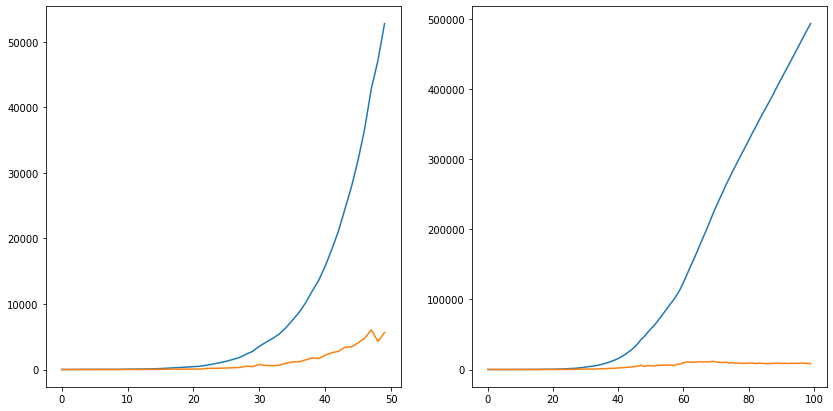

In [9]:

fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(X_train, y_train, label='train')
axes[1].plot(X[:100], y.iloc[:100], label='data up to sep')

In [10]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()

lin_reg.fit(np.exp(0.1 * X_train), y_train)

LinearRegression()

In [11]:
def days_from_0(day, day0_str=day0_str):
    return (datetime.strptime(day, '%Y-%m-%d').date() - datetime.strptime(day0_str, '%Y-%m-%d').date()).days

sep, jun, may = days_from_0('2020-09-01'), days_from_0('2020-06-01'), days_from_0('2020-05-01')

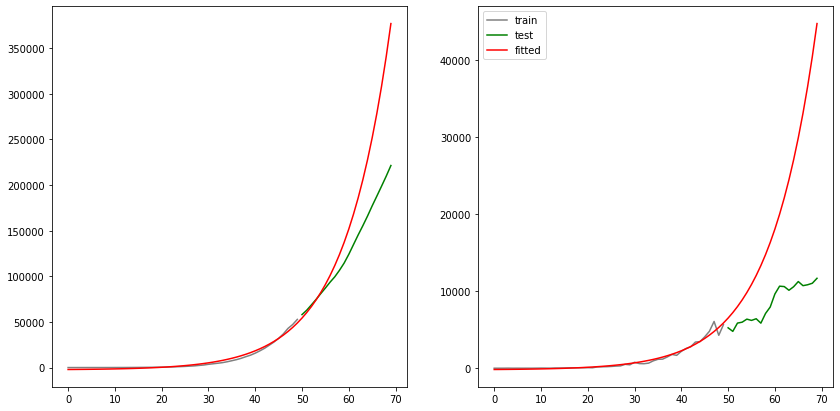

In [12]:
#plt.plot(y_train, color='gray')
delta = 20
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
for i in (0, 1):
    #axes[i].set_yscale('log')
    axes[i].plot(X_train, y_train.iloc[:, i], color='gray', label='train')
    axes[i].plot(X_test[:delta], y_test.iloc[:delta, i], color='g', label='test')
    axes[i].plot(X[:len(X_train) + delta], lin_reg.predict(np.exp(0.1 * X[:len(X_train) + delta, :]))[:, i:i+1], color='r', label='fitted')
plt.legend()

[382.3135211] -2514.9597855979337
[45.23196655] -212.79065803999424


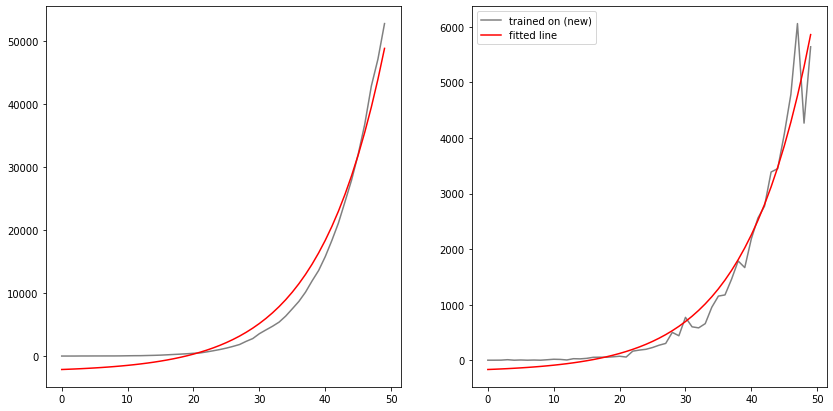

In [13]:
day_scale=0.1
def get_predicted_curves():
    w1_1, w1_2 = lin_reg.coef_
    w0_1, w0_2 = lin_reg.intercept_
    print(w1_1, w0_1)
    print(w1_2, w0_2)
    def predic_func_new_cases(x_):
        return w0_2 + w1_2 * np.exp(x_ * day_scale)

    def predic_func_total_cases(x_):
        return w0_1 + w1_1 * np.exp(x_ * day_scale)

    return predic_func_new_cases, predic_func_total_cases

predic_func_new_cases, predic_func_total_cases = get_predicted_curves()

fig, axes = plt.subplots(1, 2, figsize=(14, 7))
i=0
axes[i].plot(X_train, y_train.iloc[:, i], color='gray', label='trained on (total)')
axes[i].plot(X_train, predic_func_total_cases(X_train), color='r', label='fitted line')

i=1
axes[i].plot(X_train, y_train.iloc[:, i], color='gray', label='trained on (new)')
axes[i].plot(X_train, predic_func_new_cases(X_train), color='r', label='fitted line')
plt.legend()

In [14]:
sig1 = np.std((y_train.iloc[20:-3, 0] - predic_func_total_cases(X_train[20:-3].squeeze())))
sig2 = np.std((y_train.iloc[20:-3, 1] - predic_func_new_cases(X_train[20:-3].squeeze())))

sig1, sig2

(1083.843302870237, 180.9034548592161)

In [15]:
noise_sig = 4e5
noise_sig

400000.0

(5000, 5000)


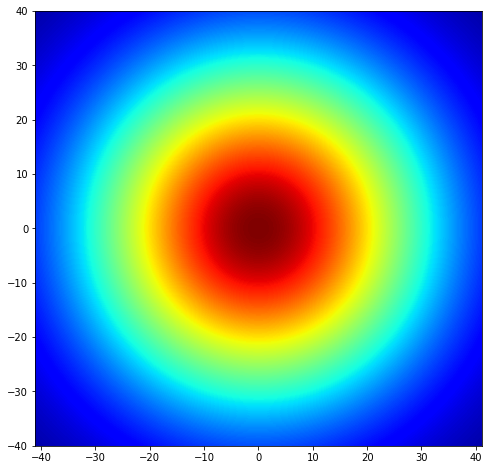

In [16]:
from scipy.stats import multivariate_normal

N = 5000

xs = np.linspace(-3, 3, N)
X_ = np.linspace(-100, 100, N)
Y_ = np.linspace(-100, 100, N)
X_, Y_ = np.meshgrid(X_, Y_)

pos = np.empty(X_.shape + (2,))
pos[:, :, 0] = X_
pos[:, :, 1] = Y_

def myplot_heatmap(Z):
    # Make the plot
    plt.axis('equal')
    plt.xlim((-40, 40))
    plt.ylim((-40, 40))
    plt.pcolormesh(X_, Y_, Z, cmap=plt.cm.jet)

cur_mu, cur_sigma = np.array([0, 0]), np.array([[500, 0], [0, 500]])

Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)
print(Z.shape)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-2, 2))
myplot_heatmap(Z)

In [17]:
Phi = np.hstack(np.exp(X_train[-1]) * (np.ones_like(X_train), np.exp(X_train)))

In [18]:
sigma = np.linalg.inv(np.linalg.inv(cur_sigma) + 1/noise_sig**2 * np.matmul(Phi.T, Phi))
mu = np.matmul(sigma, np.matmul(np.linalg.inv(cur_sigma), cur_mu) + 1/noise_sig**2 * np.matmul(Phi.T, y_train.iloc[:, 1]))
sigma

array([[ 9.19402067e-34, -6.59361652e-55],
       [-6.59361652e-55,  1.09260703e-74]])

In [19]:
#ERROR

# Z = multivariate_normal.pdf(pos, mean=mu, cov=sigma)
# print(Z.shape)

# fig = plt.figure(figsize=(8, 8))
# ax = fig.add_subplot(111)
# ax.set_xlim((xs[0], xs[-1]))
# ax.set_ylim((-2, 2))
# myplot_heatmap(Z)

С признаком в виде экспоненты не пересчитывается - слишком большие числа в признаке, сигма получается вырожденная. Можно ли все-таки оставлять такие признаки? 

Для того что бы пересчитать здесь модифицирую таргет

In [20]:
y.replace(0, 1, inplace=True)
y_train.replace(0, 1, inplace=True)

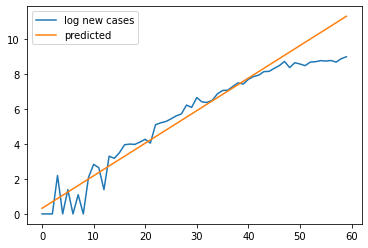

In [21]:
lin_reg = linear_model.LinearRegression()

lin_reg.fit(X_train, np.log(y_train.new_cases))
plt.plot(X[:60], np.log(y.new_cases[:60]), label='log new cases')
plt.plot(X[:60], lin_reg.predict(X[:60]), label='predicted')
plt.legend()

In [22]:
lin_reg.coef_, lin_reg.intercept_

(array([0.18596309]), 0.3206875188996463)

In [23]:
np.std(np.log(y_train.new_cases) - lin_reg.predict(X_train))

0.5960780559466519

(5000, 5000)


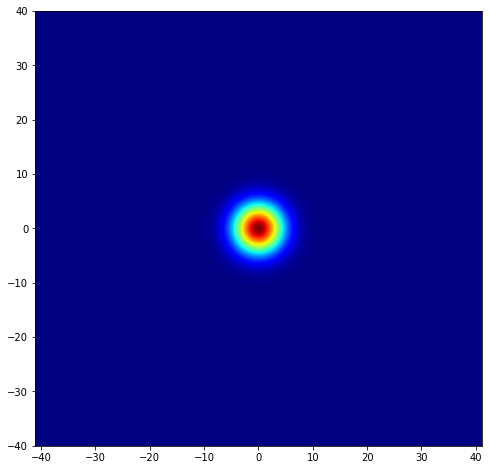

In [24]:
noise_sig = 0.5

cur_mu, cur_sigma = np.array([0, 0]), np.array([[10, 0], [0, 10]])

Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)
print(Z.shape)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-2, 2))
myplot_heatmap(Z)

In [25]:
num_pts = 50
Phi = np.hstack((np.ones_like(X_train[:num_pts]), X_train[:num_pts]))
t = np.log(y_train.new_cases[:num_pts])

sigma = np.linalg.inv(np.linalg.inv(cur_sigma) + 1/noise_sig**2 * np.matmul(Phi.T, Phi))
mu = np.matmul(sigma, np.matmul(np.linalg.inv(cur_sigma), cur_mu) + 1/noise_sig**2 * np.matmul(Phi.T, t))
sigma, mu

(array([[ 1.93741216e-02, -5.87094230e-04],
        [-5.87094230e-04,  2.39750113e-05]]), array([0.32007713, 0.18598147]))

(5000, 5000)


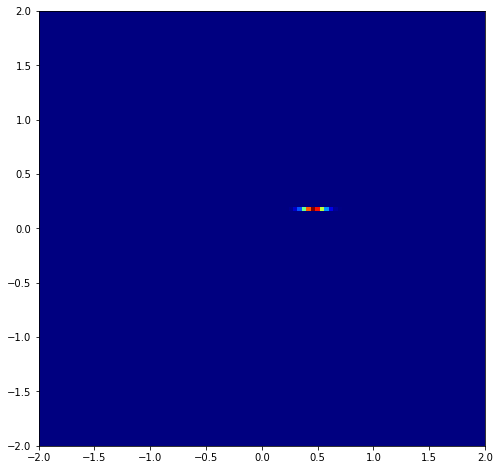

In [26]:
Z = multivariate_normal.pdf(pos, mean=mu.squeeze(), cov=sigma)
print(Z.shape)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlim((-2, 2))
ax.set_ylim((-2, 2))
ax.pcolormesh(X_, Y_, Z, cmap=plt.cm.jet)

In [27]:
sigma, mu

(array([[ 1.93741216e-02, -5.87094230e-04],
        [-5.87094230e-04,  2.39750113e-05]]), array([0.32007713, 0.18598147]))

In [28]:
w0, w1 = np.random.multivariate_normal(mu.squeeze(), sigma, 1000).T

Text(0.5, 1.0, 'test')

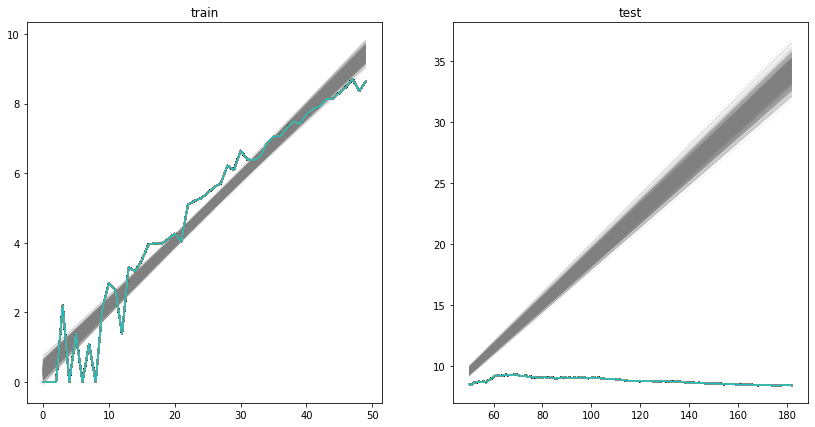

In [29]:
test_size = 133
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
for bias, k in zip(w0, w1):
    axes[0].plot(X_train, bias + k * X_train, linewidth=0.1, color='gray')

    axes[1].plot(X_test[:test_size], bias + k * X_test[:test_size], linewidth=0.1, color='gray')
    axes[1].plot(X_test[:test_size], np.log(y_test.new_cases[:test_size]))
    axes[0].plot(X_train, np.log(y_train.new_cases))

axes[0].set_title('train')
axes[1].set_title('test')

Text(0.5, 1.0, 'September 1')

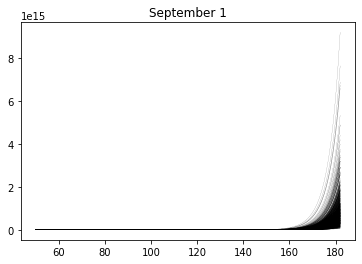

In [30]:
for bias, k in zip(w0, w1):
    plt.plot(X_test[:test_size], np.exp(bias + k * X_test[:test_size]), linewidth=0.1, color='black')
plt.title("September 1")

Text(0.5, 1.0, 'September 1, new cases')

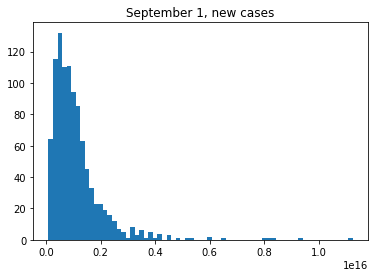

In [31]:


plt.hist(np.exp([bias + k * X_test[test_size] for bias, k in zip(w0, w1)]), bins='auto')
plt.title('September 1, new cases')

In [32]:
# TODO: precise distribution


Чтобы получить интеграл на total_cases, будем тренировать подинтегральную функцию на new_cases, модифицируем таргет и сконструируем признаки

Text(0.5, 1.0, 'total cases')

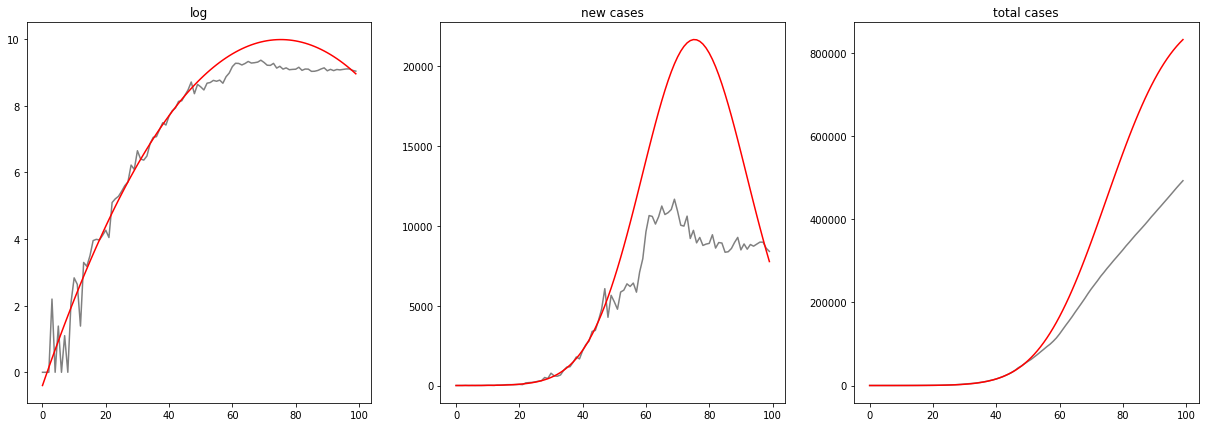

In [33]:
train_size = 50
test_size = 50

Phi = np.hstack(
    (np.ones_like(X), X, X**2)
)
features = Phi.copy()
feat_to_pred = Phi[train_size:, :].copy()

Phi = Phi[:train_size, :]

lin_reg = linear_model.LinearRegression()

lin_reg.fit(Phi, np.log(y_train.new_cases[:train_size]))
y_pred = lin_reg.predict(features[:train_size+test_size])

pred_new_cases = np.exp(y_pred)


fig, axes = plt.subplots(1, 3, figsize=(21, 7))
i=0
axes[i].plot(X[:train_size+test_size], np.log(y.new_cases[:train_size+test_size]), color='gray')
axes[i].plot(X[:train_size+test_size], y_pred, color='r')
axes[0].set_title('log')

i=1
axes[i].plot(X[:train_size+test_size], y.new_cases[:train_size+test_size], color='gray')
axes[i].plot(X[:train_size+test_size], pred_new_cases[:train_size+test_size], color='r')
axes[i].set_title('new cases')

i=2
axes[i].plot(X[:train_size+test_size], y.total_cases[:train_size+test_size], color='gray')
axes[i].plot(X[:train_size+test_size], np.cumsum(pred_new_cases[:train_size+test_size]), color='r')
plt.title('total cases')

In [34]:
num_pts = 50

t = np.log(y_train.new_cases[:num_pts])

cur_mu = [0, 0, 0]
cur_sigma = 100 * np.eye(3)

sigma = np.linalg.inv(np.linalg.inv(cur_sigma) + 1/noise_sig**2 * np.matmul(Phi.T, Phi))
mu = np.matmul(sigma, np.matmul(np.linalg.inv(cur_sigma), cur_mu) + 1/noise_sig**2 * np.matmul(Phi.T, t))
sigma, mu

(array([[ 4.15663127e-02, -3.35831955e-03,  5.65373381e-05],
        [-3.35831955e-03,  3.70332053e-04, -7.06821005e-06],
        [ 5.65373381e-05, -7.06821005e-06,  1.44256007e-07]]),
 array([-0.3964163 ,  0.27560849, -0.00182955]))

In [35]:
weighs = np.random.multivariate_normal(mu.squeeze(), sigma, 1000)


Text(0.5, 1.0, 'total cases')

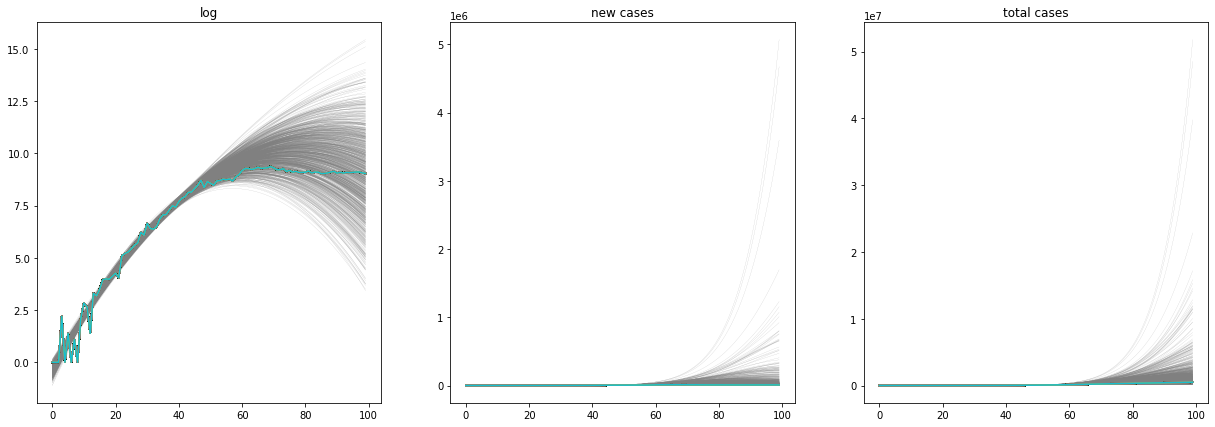

In [36]:
train_size = 50
test_size = 50
fig, axes = plt.subplots(1, 3, figsize=(21, 7))

for w0, w1, w2 in weighs:
    y_pred = w0 + w1 * X[:train_size+test_size] + w2 * X[:train_size+test_size]**2
    exp_y_pred = np.exp(y_pred)
    axes[0].plot(X[:train_size+test_size], y_pred, linewidth=0.1, color='gray')
    axes[0].plot(X[:train_size+test_size], np.log(y.new_cases[:train_size+test_size]))

    axes[1].plot(X[:train_size+test_size], exp_y_pred, linewidth=0.1, color='gray')
    axes[1].plot(X[:train_size+test_size], y.new_cases[:train_size+test_size])

    axes[2].plot(X[:train_size+test_size], np.cumsum(exp_y_pred), linewidth=0.1, color='gray')
    axes[2].plot(X[:train_size+test_size], y.total_cases[:train_size+test_size])

axes[0].set_title('log')
axes[1].set_title('new cases')
axes[2].set_title('total cases')

(-4000000.0, 80000000.0)

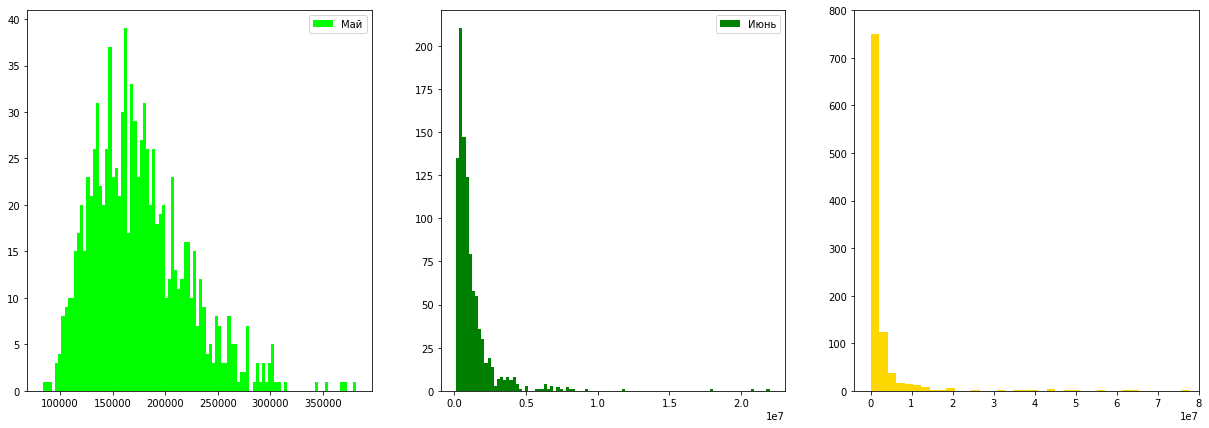

In [50]:
from matplotlib.patches import Patch
res = np.cumsum(np.exp(np.matmul(weighs, features.T).T), axis=0)

fig, axes = plt.subplots(1, 3, figsize=(21, 7))
axes[0].hist(res[may], bins=100, color='lime')


axes[0].legend(handles=[Patch(facecolor='lime',
                         label='Май')], loc='upper right')

axes[1].hist(res[jun], bins=100, color='g')
axes[1].legend(handles=[Patch(facecolor='g',
                         label='Июнь')], loc='upper right')

axes[2].hist(res[sep], bins=3000, color='gold')
# axes[2].legend(handles=[Patch(facecolor='gold',
#                          label='Сентябрь')], loc='upper right')

axes[2].set_ylim(0, 800)
axes[2].set_xlim(-4e6, 8e7)

(0.0, 40000000.0)

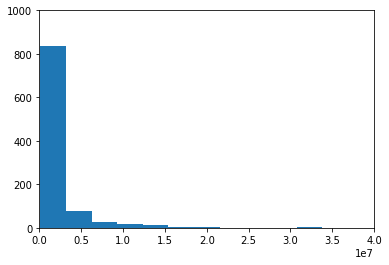

In [45]:
plt.hist(res[sep], bins=2000)
plt.gca().set_ylim(0, 1000)
plt.gca().set_xlim(0, 4e7)

In [39]:
for date in (may, jun, sep):
    print(np.percentile(res[date], [10, 90]))

[122304.99977195 234240.02733747]
[ 307012.53717523 2469780.12896475]
[ 321348.36910609 5095512.47699258]


Вывод: принимать решение на основании прогноза невозможно уже на июнь. Март + 50 дней, это 20 апреля, три недели локдауна-удаленки. На графике начинает быть виден какой-то перелом - может быть подействовал карантин? Но модель еще не может это уловить. На май прогнозы от ста до двухсот тысяч, наверное можно что-то сказать про количество мест в больнице, например. А уже к июню отличие на порядок - наверное переболеют меньше 1% населения России, но вряд ли меньше трехсот тысяч.